In [107]:
import numpy as np
import matplotlib.pyplot as plt
import fsps
import os
from tqdm import tqdm
# from matplotlib.animation import FuncAnimation

In [108]:
#creating a stellar population with an SSP imf
#we'll leave out the dust for now

sp = fsps.StellarPopulation(compute_vega_mags=False, zcontinuous=1, sfh=0, logzsol=0.0, add_dust_emission=False,
    frac_nodust=1, frac_obrun=1, agb_dust=0)


100%|██████████| 30/30 [00:47<00:00,  1.59s/it]


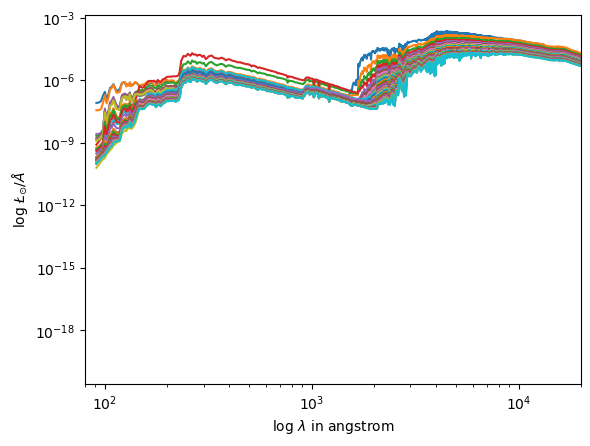

In [109]:
# Here we get the spectra of the SP
ages = np.linspace(1, 13.7, 30)


fig, ax2 = plt.subplots(1,1)

for age in tqdm(ages):
    wave, spec = sp.get_spectrum(tage=age, peraa=True)
    ax2.plot(wave, spec, label=f"{round(age,2)} Gyr")


ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlim(80, 20000)
# ax2.legend(bbox_to_anchor=(1, 0.4))
ax2.set_xlabel("log $\lambda$ in angstrom")
ax2.set_ylabel("log $\L_{\odot}/\\AA$")
plt.show()

100%|██████████| 2/2 [00:00<00:00,  3.35it/s]


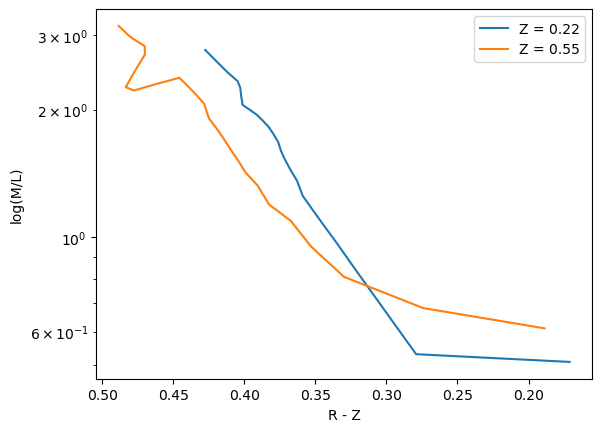

In [131]:
# Here we make a colour-M/L plot
# We can get the colour from the filters in fsps
filters = fsps.find_filter('sdss')


metalicities = [0.22, 0.55]


fig, ax = plt.subplots(1, 1)

for Z in tqdm(metalicities):
    colour = []
    ratio = []
    sp.params['logzsol'] = Z
    for age in ages:
        wave, spec = sp.get_spectrum(tage=age, peraa=True)
        mass = sp.stellar_mass
        lum = np.trapz(spec, wave)
        ratio.append(mass / lum)

        mags = sp.get_mags(tage=age, bands=filters)
        colour.append(mags[2] - mags[3])

    ax.plot(colour, ratio, label=f"Z = {Z}")
    ax.legend()
    ax.set_xlabel("R - Z")
    ax.set_ylabel('log(M/L)')
    ax.set_yscale('log')
    # ax.set_xlim(0.5, 0.1)
plt.gca().invert_xaxis()
plt.show()
